# OpenCV deskew

Import all the necesary libraries.

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
import math
%matplotlib inline

Display the image to deskew.

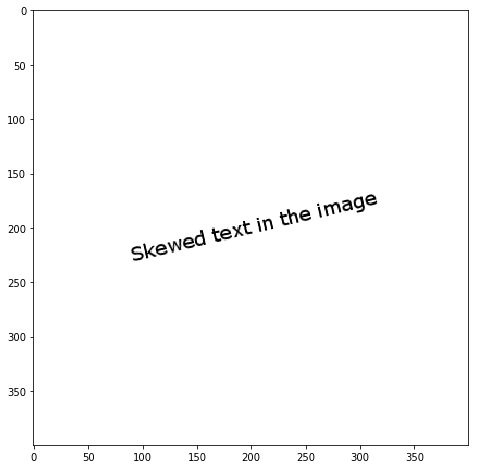

In [56]:
image = cv2.imread('data/skewed.png')

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image, interpolation='nearest')

Convert to grayscale and extract the mask.

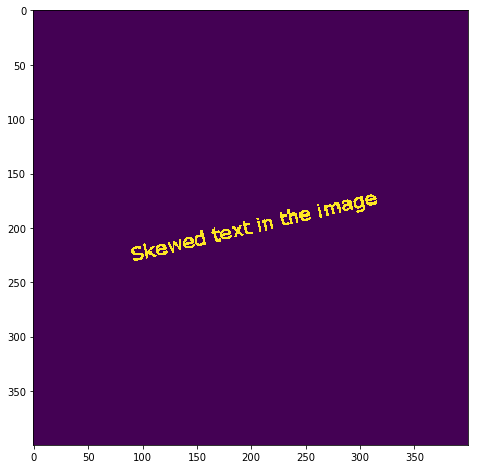

In [57]:
img2gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 180, 255, cv2.THRESH_BINARY)
image_final = cv2.bitwise_and(img2gray, img2gray, mask = mask)
ret, new_img = cv2.threshold(image_final, 180, 255, cv2.THRESH_BINARY_INV)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(new_img, interpolation='nearest')

Define the kernel.

To manipulate the orientation of dilation.

Large y means more vertical dilation, large x means more horizontal dilation.

In [58]:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
dilated = cv2.dilate(new_img, kernel, iterations = 9)

Extract the contours from the image.

In [59]:
_, contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

Iterate through the extracted contours and draw them on the image.

We will also store the angle into a variable.

In [60]:
angle = 0

original_image = np.copy(image)
original_shape = (image.shape[0], image.shape[1])

for contour in contours:
    
    # get rectangle bounding contour
    [x, y, w, h] = cv2.boundingRect(contour)
    
    # don't plot small false positives that aren't text
    if w < 35 and h < 35:
        continue
        
    # draw rectangle around contour on original image
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 255), 2)
    
    rect = cv2.minAreaRect(contour)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    image = cv2.drawContours(image, [box], 0, (0, 0, 255), 2)
    
    # create a sub-image with applied rotation
    center = rect[0]
    angle = rect[2]
    
    # use rotation matrix to rotate the original image
    rot = cv2.getRotationMatrix2D(center, angle, 1)
    rotated_image = cv2.warpAffine(original_image, rot, original_shape)

Display the images with the extracted contours.

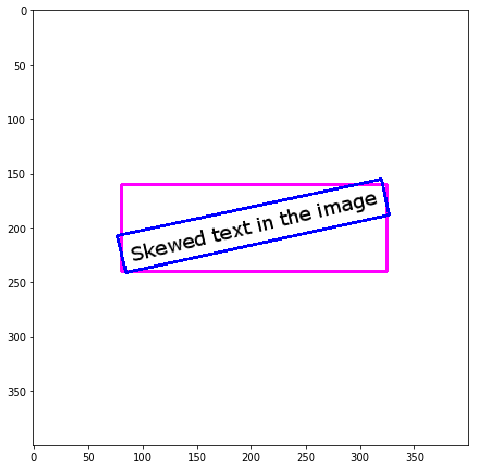

In [61]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image, interpolation='nearest')

Display the deskewed image.

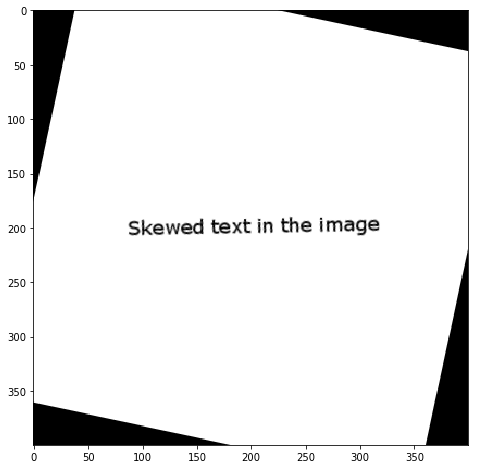

In [62]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(rotated_image, interpolation='nearest')

Print the detected angle.

In [63]:
angle

-12.22961711883545